In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv('../datasets/heart.csv')
data.shape

(299, 14)

# Logistic Regression

In [3]:
X = data.drop(['target'], axis=1)
y = data.target

In [4]:
from sklearn.utils import shuffle

X, y = shuffle(X, y, random_state=1)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [7]:
# here we go, first prediction! and after we gonna see the confusion matrix and the different scores
y_pred = clf.predict(X_test)

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

print('The confusion matrix : \n', confusion_matrix(y_test, y_pred))
print('The accuracy score : ', accuracy_score(y_test, y_pred))
print('The precission score : ', precision_score(y_test, y_pred))
print('The recall score : ', recall_score(y_test, y_pred))
print('The f1 score : ', f1_score(y_test, y_pred))

The confusion matrix : 
 [[16 10]
 [ 3 31]]
The accuracy score :  0.7833333333333333
The precission score :  0.7560975609756098
The recall score :  0.9117647058823529
The f1 score :  0.8266666666666665


Text(0.5, 257.44, 'Actual Values')

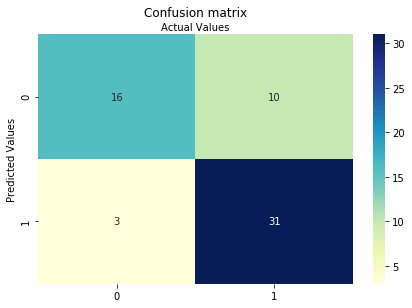

In [9]:
# although we already have the confusion matrix, we can generate it within a heat map and in a format that we can export for future use
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')

### This results are good, nevertheless let's try other methods

# Random Forest

the training scores:  [0.5347631634785379, 0.7488257129315867, 0.8847916045945613, 0.9246255374362867, 0.930619227545858]
the testing scores:   [0.4361712510640883, 0.6408876509516761, 0.8315839456611088, 0.8908264015089102, 0.8984189547250524]


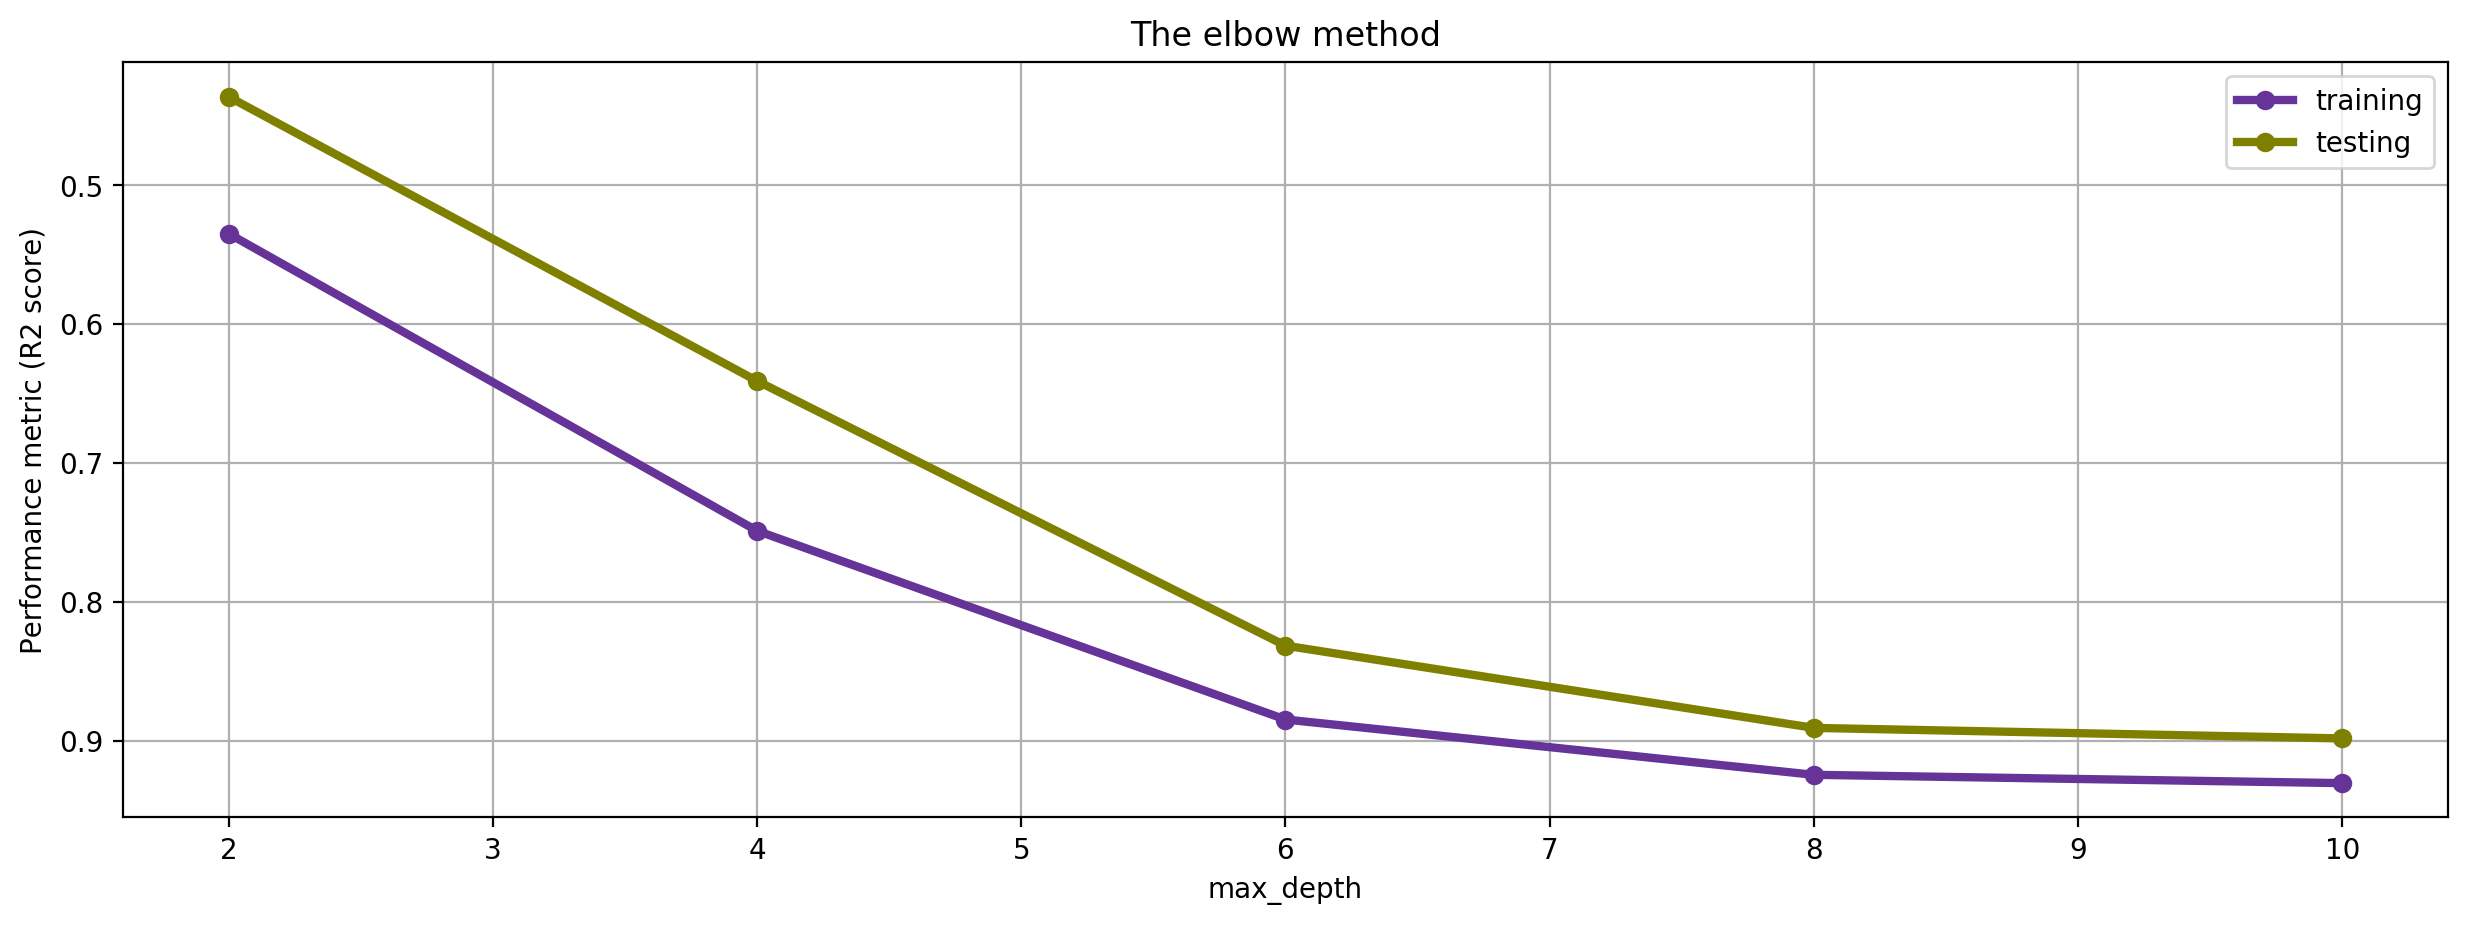

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

max_depth =  [2, 4, 6, 8, 10]
training = []
testing = []

for i in max_depth:
    regr = RandomForestRegressor(max_depth=i, random_state=1).fit(X, y)
    y_predict_train = regr.predict(X_train)
    y_predict_test = regr.predict(X_test)
    training.append(r2_score(y_train, y_predict_train))
    testing.append(r2_score(y_test, y_predict_test))
    
print('the training scores: ',training)    
print('the testing scores:  ',testing)   

#Plotting the results onto a line graph, allowing us to observe 'The elbow'

plt.figure(figsize= (15,5), dpi=200)
plt.plot( max_depth, training, 'bo-', color='rebeccapurple', lw=3, label='training')
plt.plot( max_depth, testing, 'bo-', color='olive', lw=3, label='testing')
plt.grid()
plt.title('The elbow method')
plt.xlabel('max_depth')
plt.ylabel('Performance metric (R2 score)') 
plt.legend()
plt.gca().invert_yaxis()
plt.show()

# KNN

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

y_pred_knn = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred_knn)
print('The confusion matrix : \n', cm)

accuracy = accuracy_score(y_test, y_pred_knn)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

The confusion matrix : 
 [[16 10]
 [10 24]]
Accuracy of our model is equal 66.67 %.


In [13]:
# Instantiating learning model (k = 5) increasing the k
classifier = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

y_pred_knn = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred_knn)
print('The confusion matrix : \n', cm)

accuracy = accuracy_score(y_test, y_pred_knn)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

The confusion matrix : 
 [[16 10]
 [ 6 28]]
Accuracy of our model is equal 73.33 %.


In [14]:
# Instantiating learning model (k = 7) increasing the k
classifier = KNeighborsClassifier(n_neighbors=7).fit(X_train, y_train)

y_pred_knn = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred_knn)
print('The confusion matrix : \n', cm)

accuracy = accuracy_score(y_test, y_pred_knn)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

The confusion matrix : 
 [[16 10]
 [ 6 28]]
Accuracy of our model is equal 73.33 %.


In [16]:
# Instantiating learning model (k = 11) increasing the k
classifier = KNeighborsClassifier(n_neighbors=11).fit(X_train, y_train)

y_pred_knn = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred_knn)
print('The confusion matrix : \n', cm)

accuracy = accuracy_score(y_test, y_pred_knn)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

The confusion matrix : 
 [[15 11]
 [ 8 26]]
Accuracy of our model is equal 68.33 %.


# Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier().fit(X_train, y_train)

In [18]:
decision_tree_pred = decision_tree.predict(X_test)

In [19]:
print('The confusion matrix : \n', confusion_matrix(y_test, decision_tree_pred))
print('The accuracy score : ', accuracy_score(y_test, decision_tree_pred))
print('The precission score : ', precision_score(y_test, decision_tree_pred))
print('The recall score : ', recall_score(y_test, decision_tree_pred))
print('The f1 score : ', f1_score(y_test, decision_tree_pred))

The confusion matrix : 
 [[15 11]
 [11 23]]
The accuracy score :  0.6333333333333333
The precission score :  0.6764705882352942
The recall score :  0.6764705882352942
The f1 score :  0.6764705882352942


# SVM

In [20]:
from sklearn.svm import SVC
svm = SVC(kernel= 'rbf').fit(X_train, y_train)

In [21]:
svm_pred = svm.predict(X_test)

In [22]:
print('The confusion matrix : \n', confusion_matrix(y_test, svm_pred))
print('The accuracy score : ', accuracy_score(y_test, svm_pred))
print('The precission score : ', precision_score(y_test, svm_pred))
print('The recall score : ', recall_score(y_test, svm_pred))
print('The f1 score : ', f1_score(y_test, svm_pred))

The confusion matrix : 
 [[ 8 18]
 [ 5 29]]
The accuracy score :  0.6166666666666667
The precission score :  0.6170212765957447
The recall score :  0.8529411764705882
The f1 score :  0.7160493827160493


# Naive Bayes

In [23]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB().fit(X_train, y_train)

In [24]:
nb_pred = nb.predict(X_test)

In [25]:
print('The confusion matrix : \n', confusion_matrix(y_test, nb_pred))
print('The accuracy score : ', accuracy_score(y_test, nb_pred))
print('The precission score : ', precision_score(y_test, nb_pred))
print('The recall score : ', recall_score(y_test, nb_pred))
print('The f1 score : ', f1_score(y_test, nb_pred))

The confusion matrix : 
 [[18  8]
 [ 6 28]]
The accuracy score :  0.7666666666666667
The precission score :  0.7777777777777778
The recall score :  0.8235294117647058
The f1 score :  0.7999999999999999
